# Data visualization and validation

In this notebook, we will visualize all the available data. In particular, all the data that will be used for sure in the project, but more data such as the ERA5 sea-level-pressure fields can be loaded and visualized, so please refer to the `sscode/` folder for more information. Again, all the functions / classes used in the notebooks are hosted and documented in the repository, so please refer to the code in case any doubt exists!!

```{note}
Nevertheless, the functions used and how they work will be also explained in this introductory first notebook
```

In [1]:
# common
import os, sys

# arrays
import numpy as np
import pandas as pd
import xarray as xr

# append sscode to path
sys.path.insert(0, os.path.join(os.path.abspath(''), '..'))

# custom
from sscode.data import Loader, load_moana_hindcast, load_predictor, \
    join_load_uhslc_tgs, load_moana_hindcast_ss

# warnings
import warnings
warnings.filterwarnings('ignore')

DATA PATH /home/javitausia/Documentos/geocean-nz-ss/data


## Plot all available data

After a lot of preprocessing and data analysis work, the datasets that are going to be primary used for convenience reasons are:

* The Moana v2 hindcast as the storm surge hindcast predictand
* The CFSR sea-level-pressure fields and u10 and v10 wind components as the predictors (notice here that we also calculated the projected winds to a determined location in the islands, go to the end of this notebook to see results)
* Some [UHSLC](https://uhslc.soest.hawaii.edu/) tidal gauges as the "validators", although more tidal gauges from different resources / organizations might be also helpful

data format is available in the figure below:

```{figure} ../media/images/data-format.png
---
width: 700px
name: data-format
---
Main datasets format that will be used in all the available notebooks
```

and all this data is plotted in the figure below, using a plotting function located at `sscode/plotting/data.py` !!

## Load and validate the data

Below we use the **class Loader** to simultaneously load the three datasets that will be commonly used in all the notebooks. Notice that here, we say `plot=(False,True,True)`, but this parameter can be changed to save time and space in our running notebooks. This class uses different loading funtions, and is hosted at `sscode/data.py`, where the `data_to_load` parameter accepts the following inputs:

```python
    loader_dict_options = {
        'predictor':  ['cfsr','era_5'],
        'predictand': ['dac','moana','codec'],
        'validator':  ['uhslc','linz','other','privtgs']
    }
```

Once the data is loaded, we validate the Moana v2 hindcast data ("moana") with the University of Hawaii tidal guages ("uhslc"), for the specified variables, in this case, the storm surge, obtaining very good results!!


 loading and managing atmospheric data... 


 resampling data to 1D... 


 loading the sea-level-pressure fields... 


 loading and calculating the winds... 


 loading the Moana v2 hindcast data... 



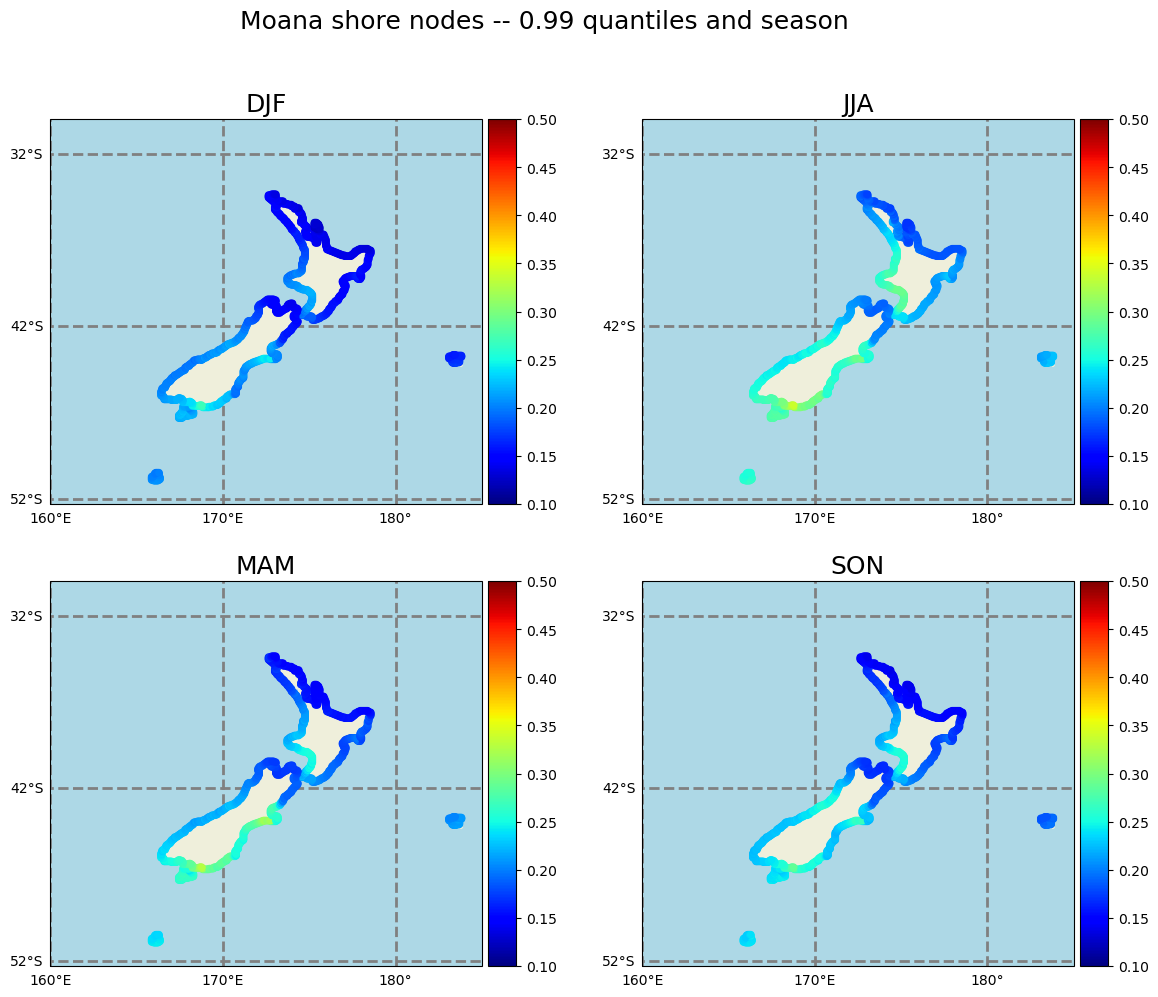


 loading and plotting the UHSLC tidal guages... 



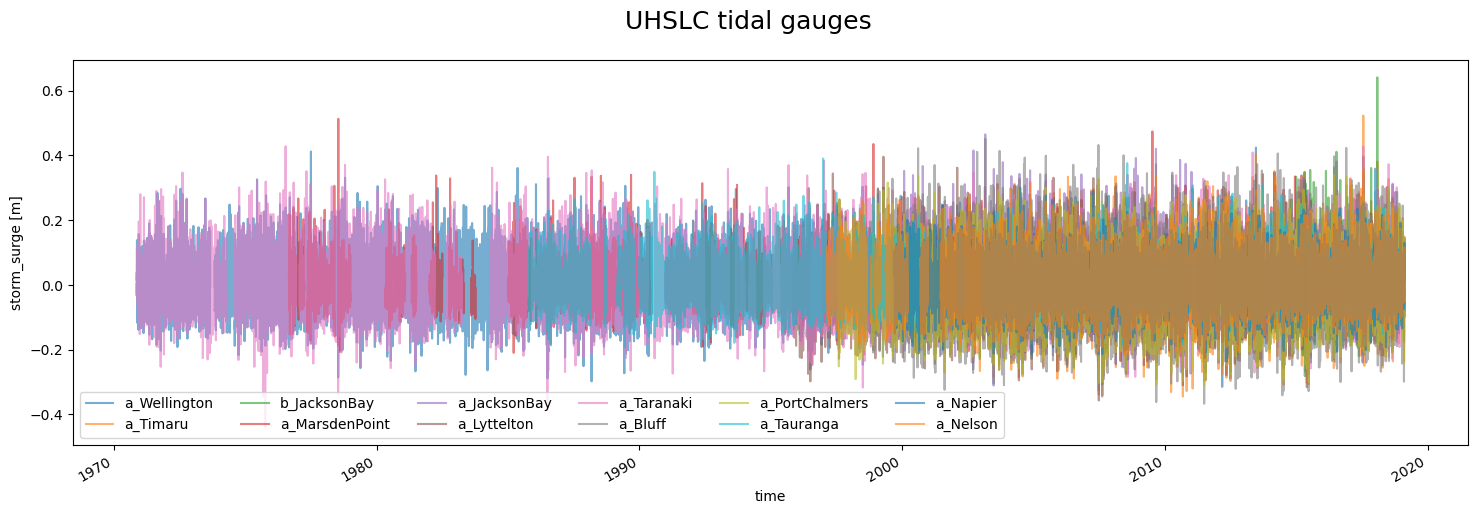

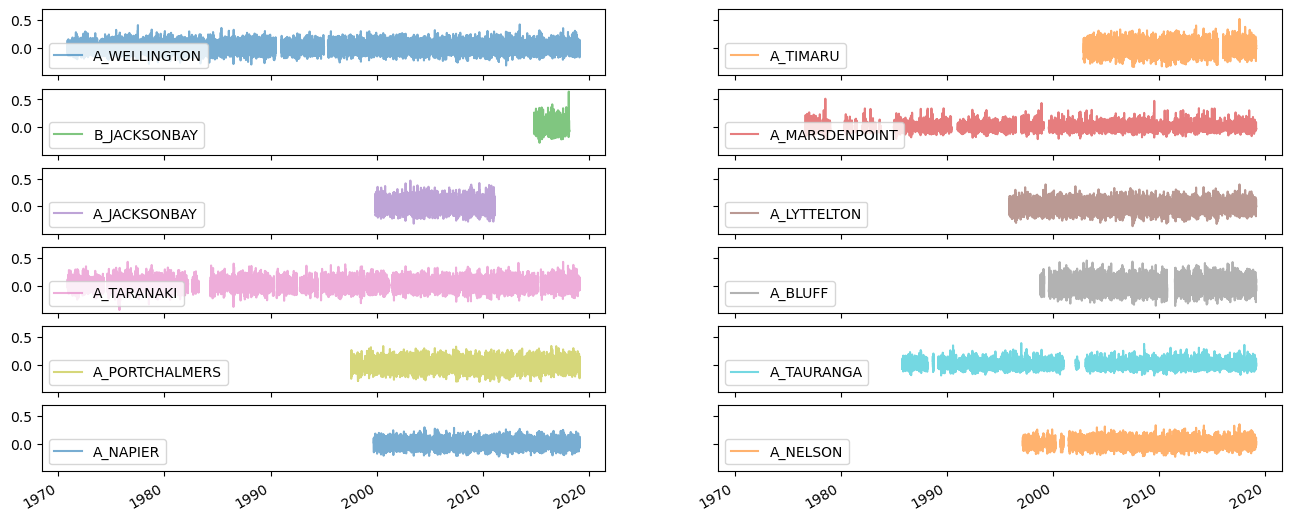


 Lets compare data in Moana v2 hindcast with UHSLC tgs!! 


 
 TGs to analyze are: 
 ['a_Wellington' 'a_Timaru' 'b_JacksonBay' 'a_MarsdenPoint' 'a_JacksonBay'
 'a_Lyttelton' 'a_Taranaki' 'a_Bluff' 'a_PortChalmers' 'a_Tauranga'
 'a_Napier' 'a_Nelson'] 


 which correspond to 
 [689, 328, 393, 1327, 393, 480, 999, 116, 224, 1124, 949, 708] 
 in Moana v2 hindcast 


 calculated min distances (km) in Moana v2 hindcast to UHSLC tgs: 
 [10.091858550595918, 5.125532152668501, 6.897621081071355, 7.807937095794992, 6.897621081071355, 8.749086655427975, 0.7284939428839287, 2.827544577707935, 8.837335750916106, 4.69880874581877, 1.8441234559361162, 4.255617965385927] 



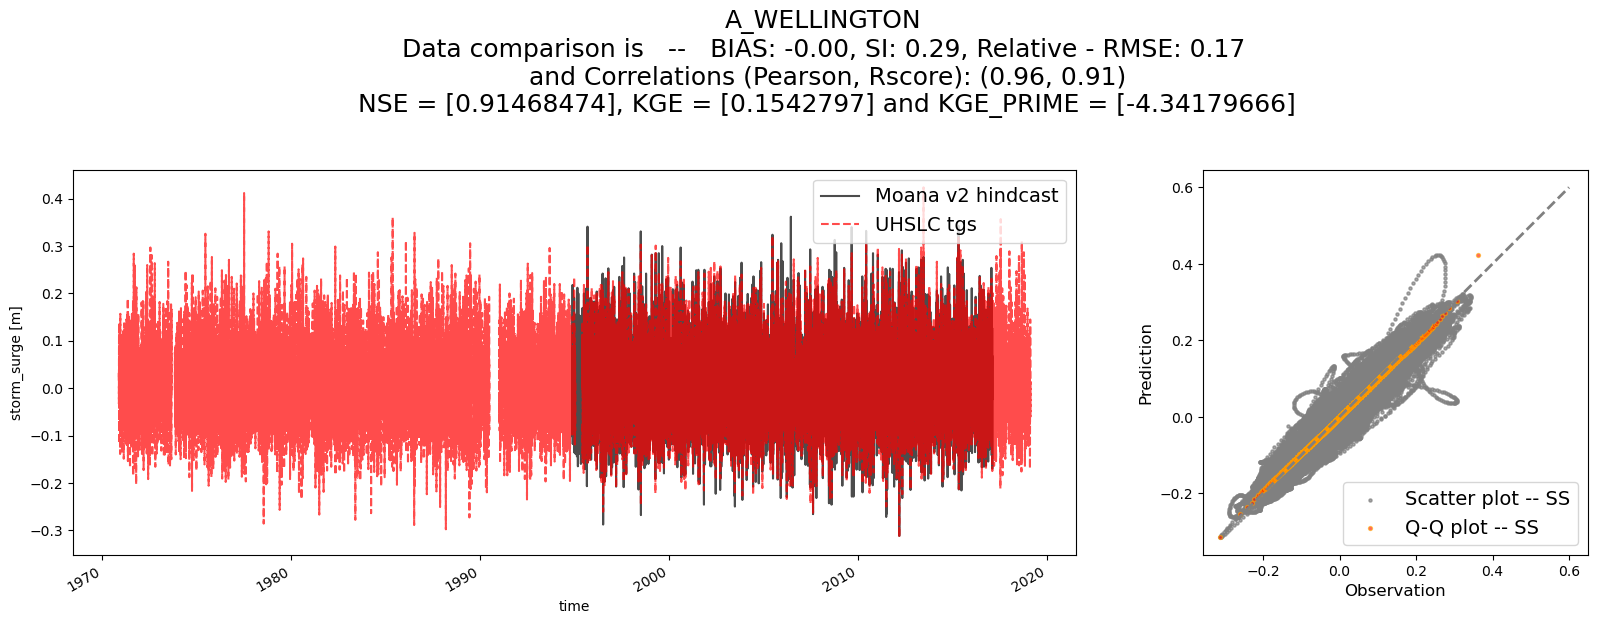

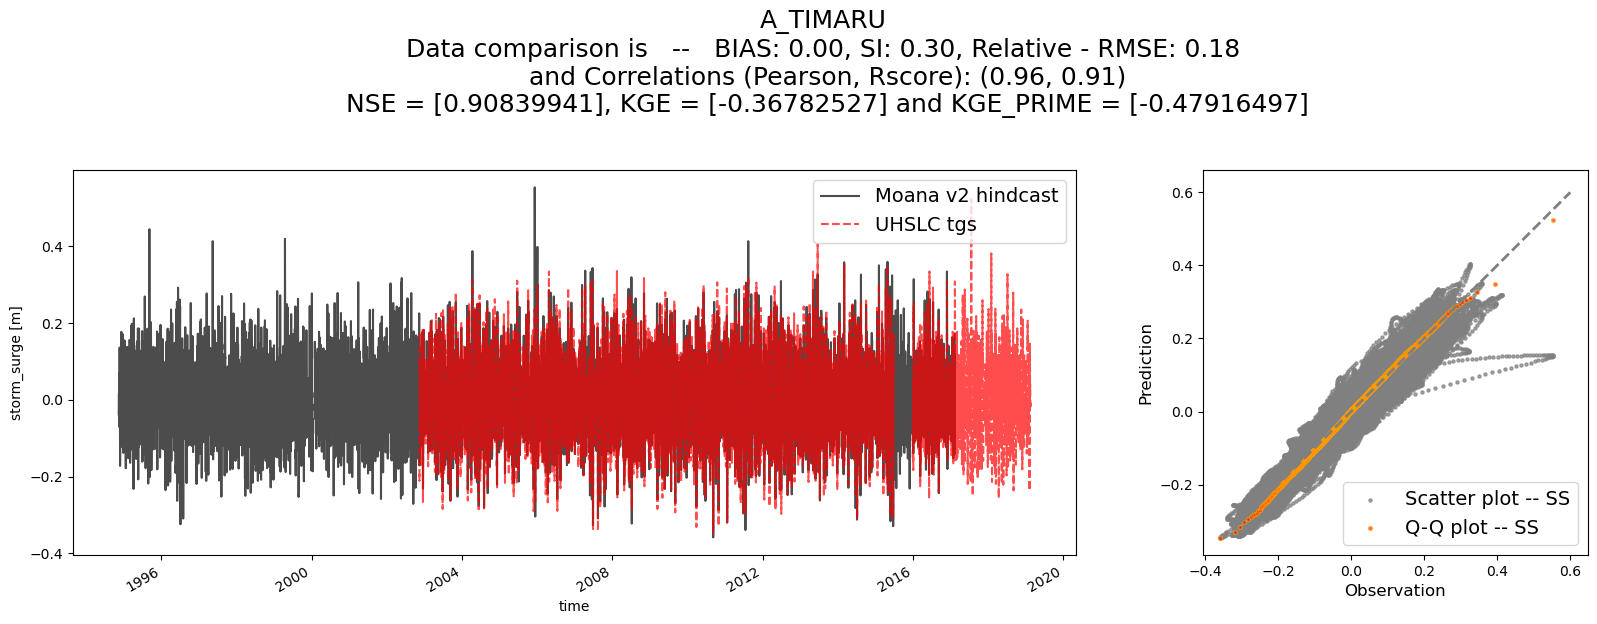

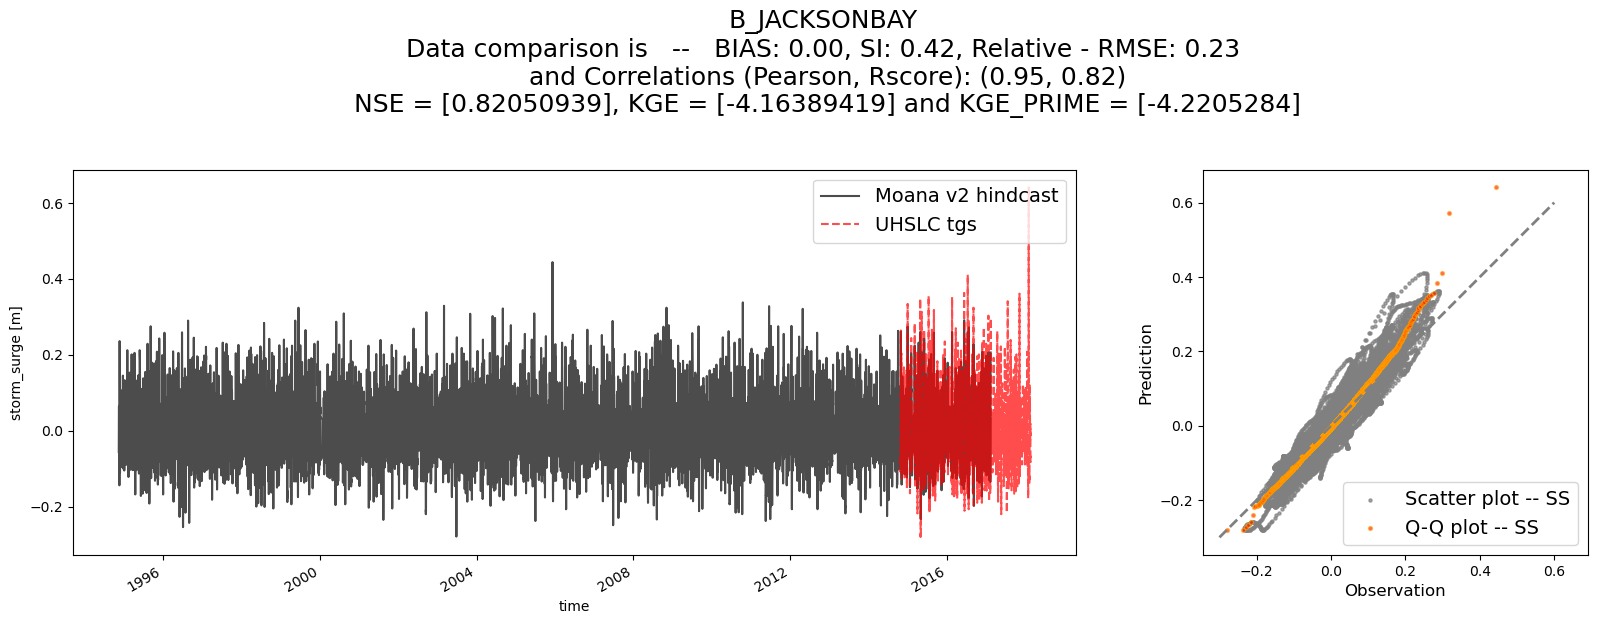

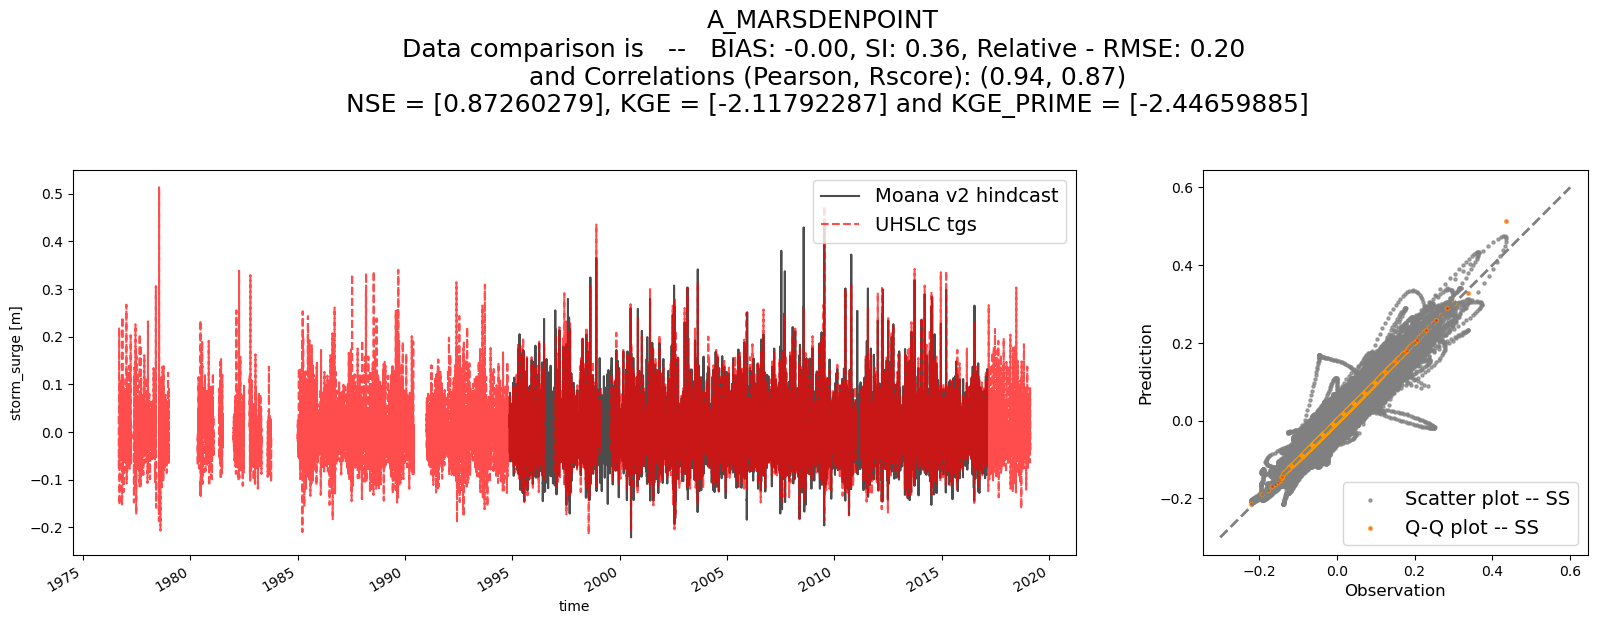

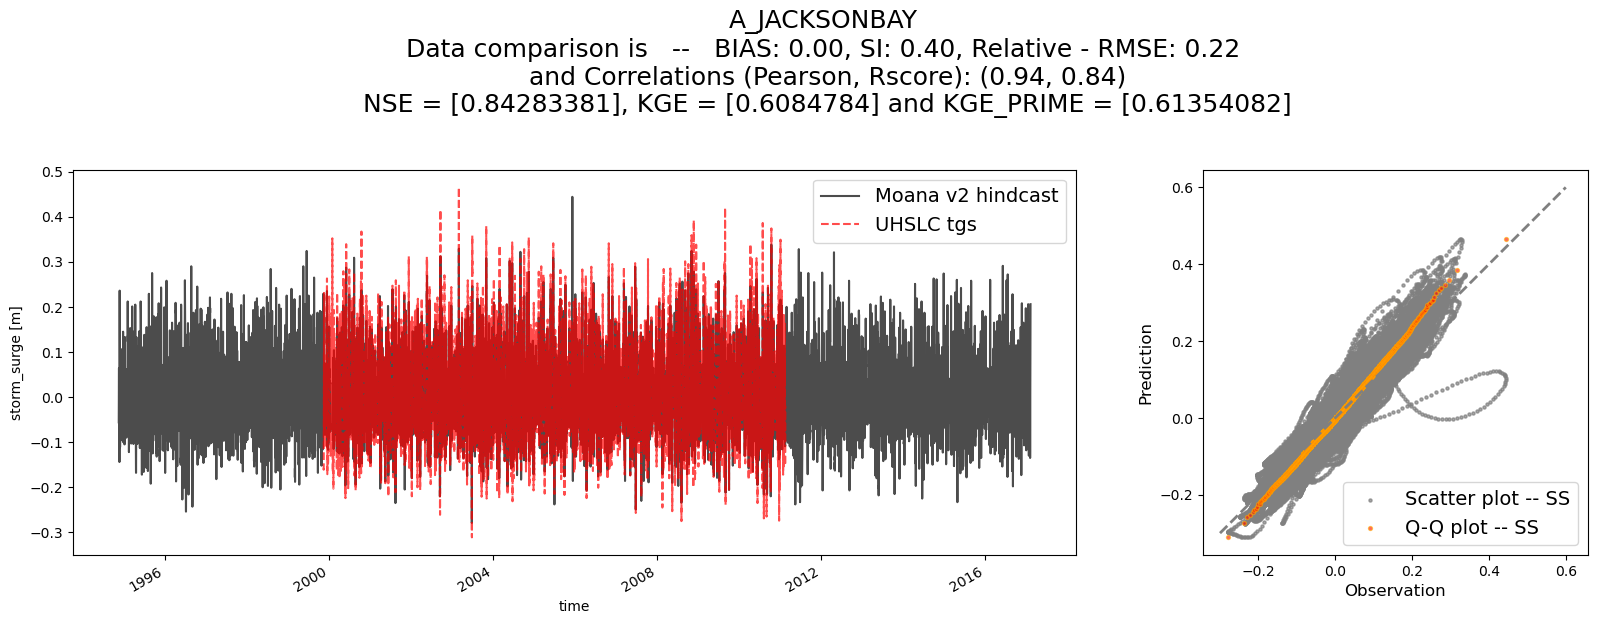

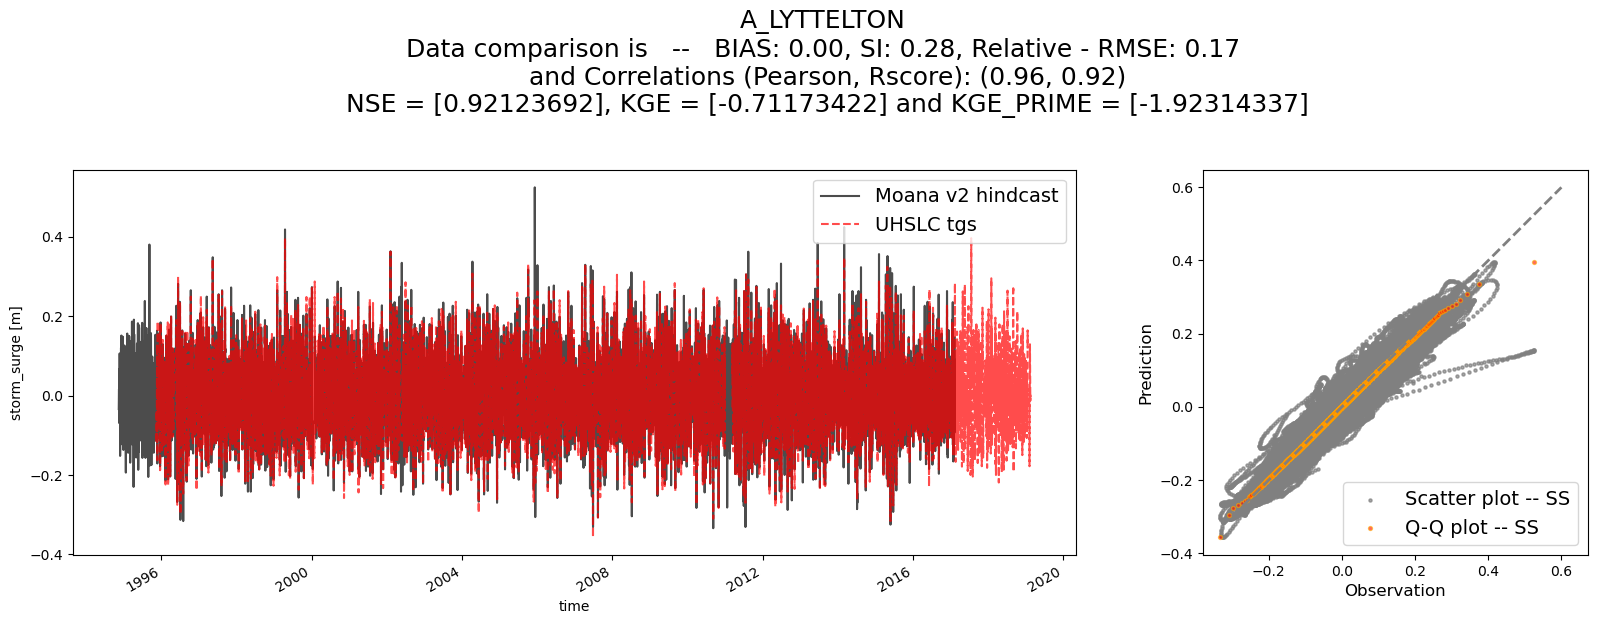

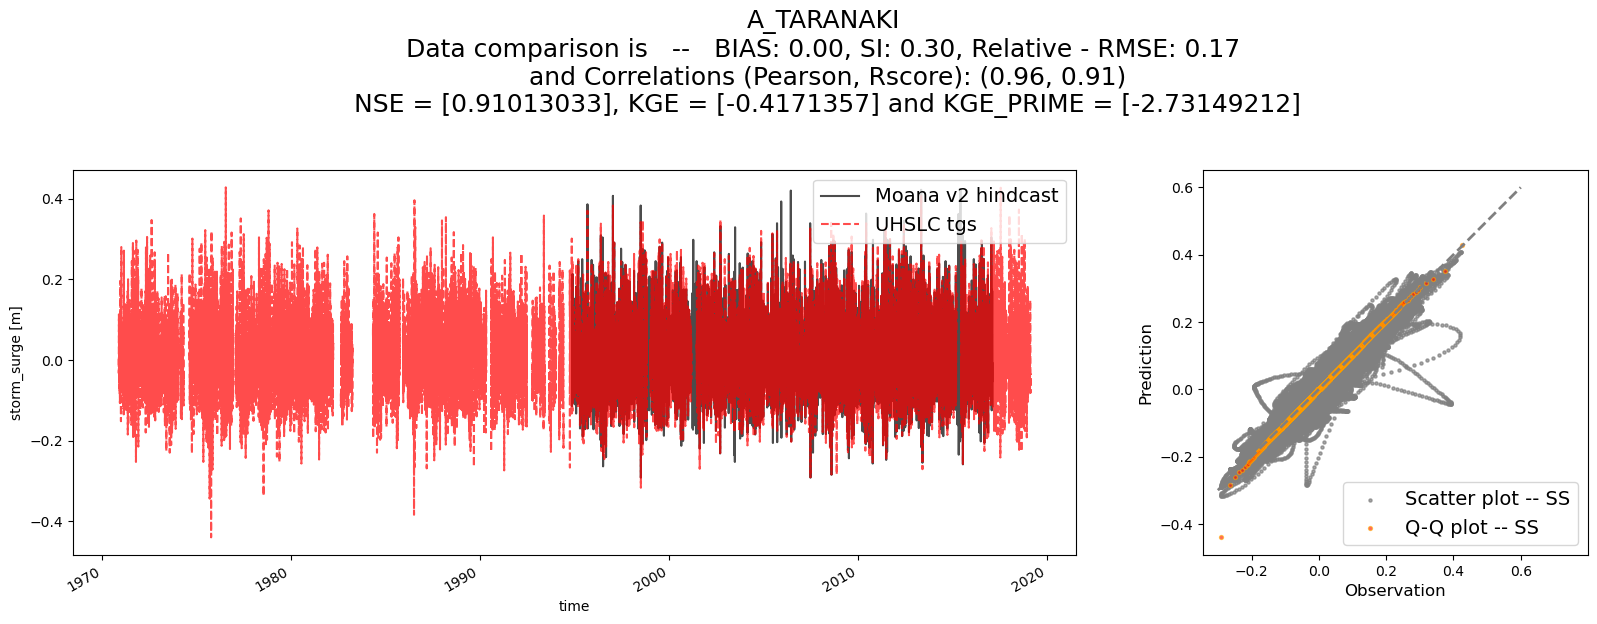

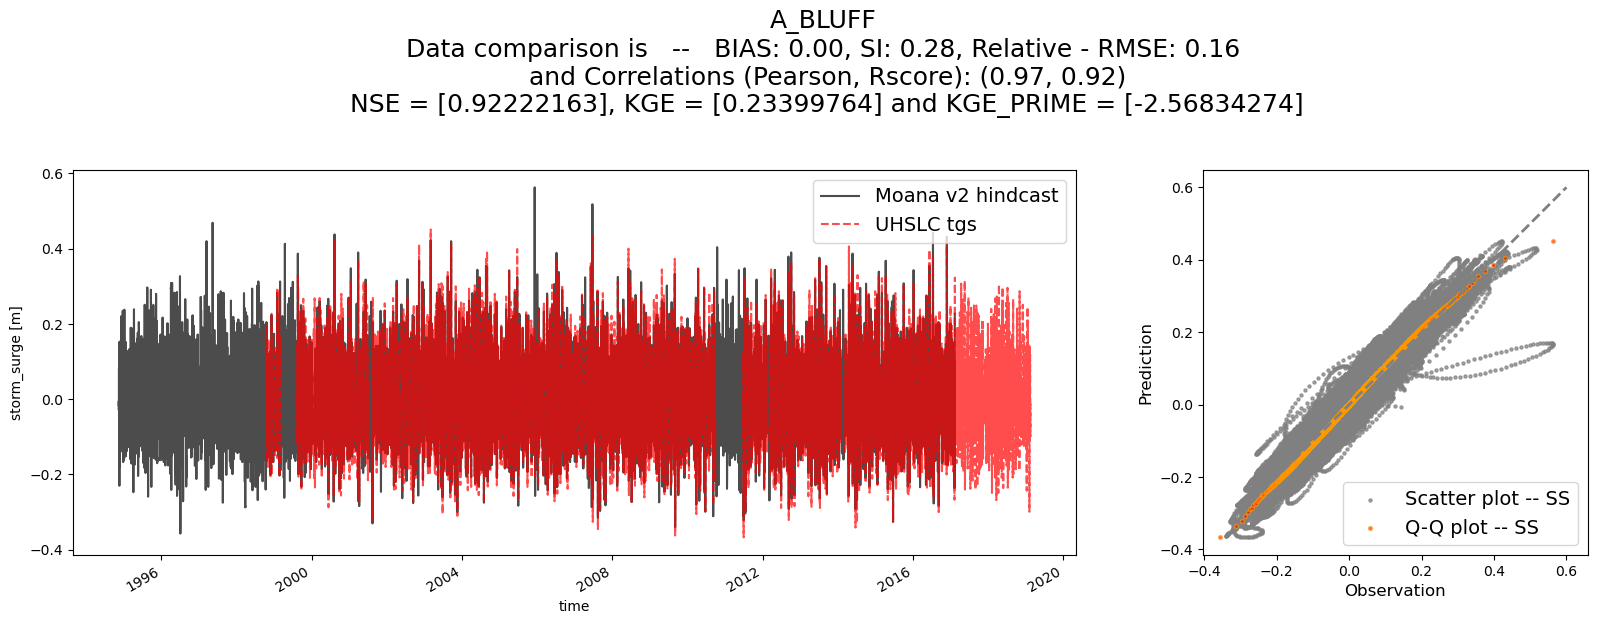

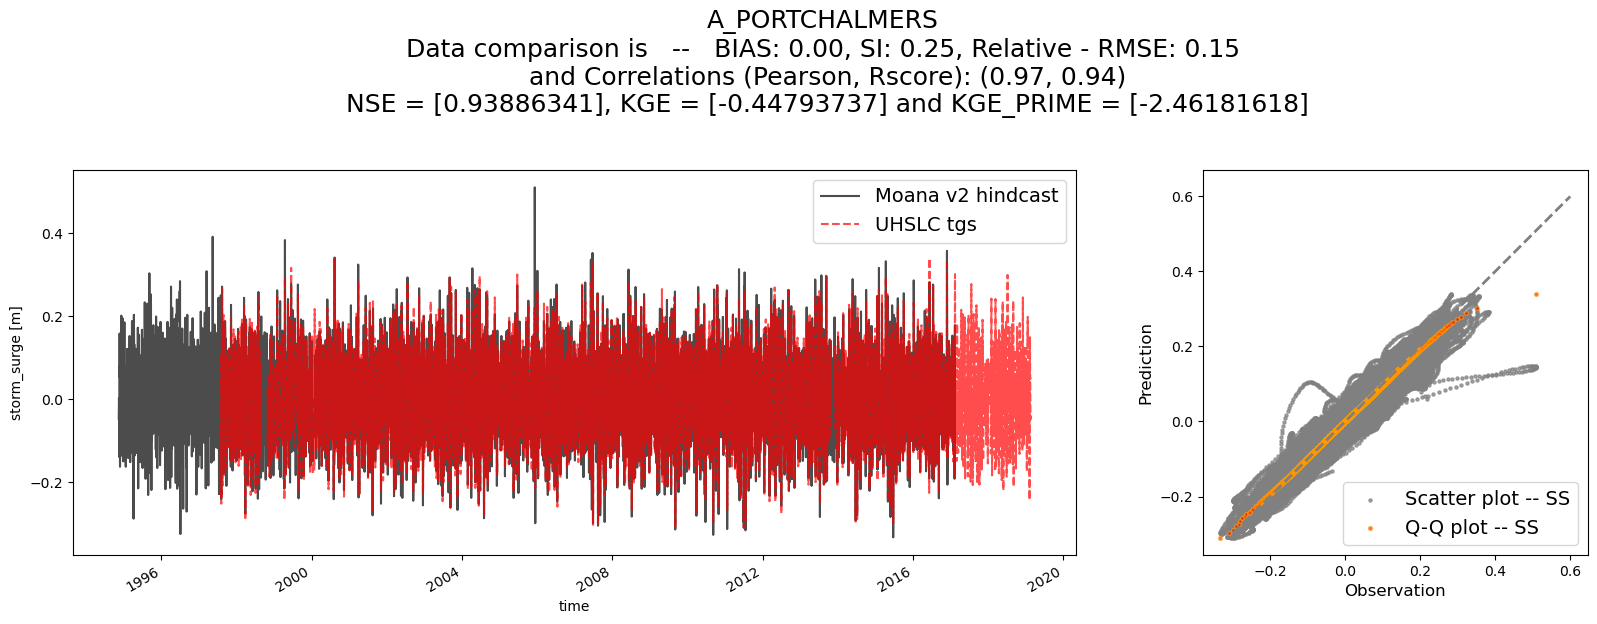

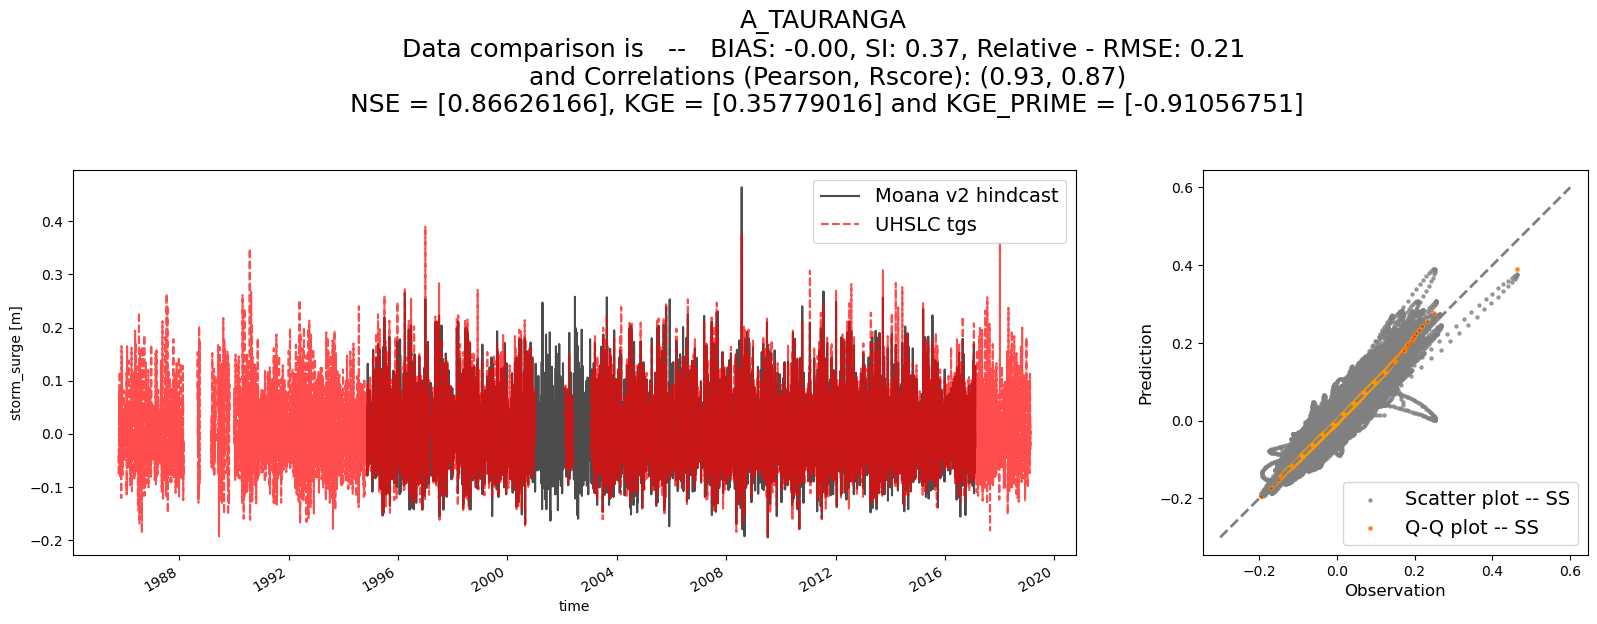

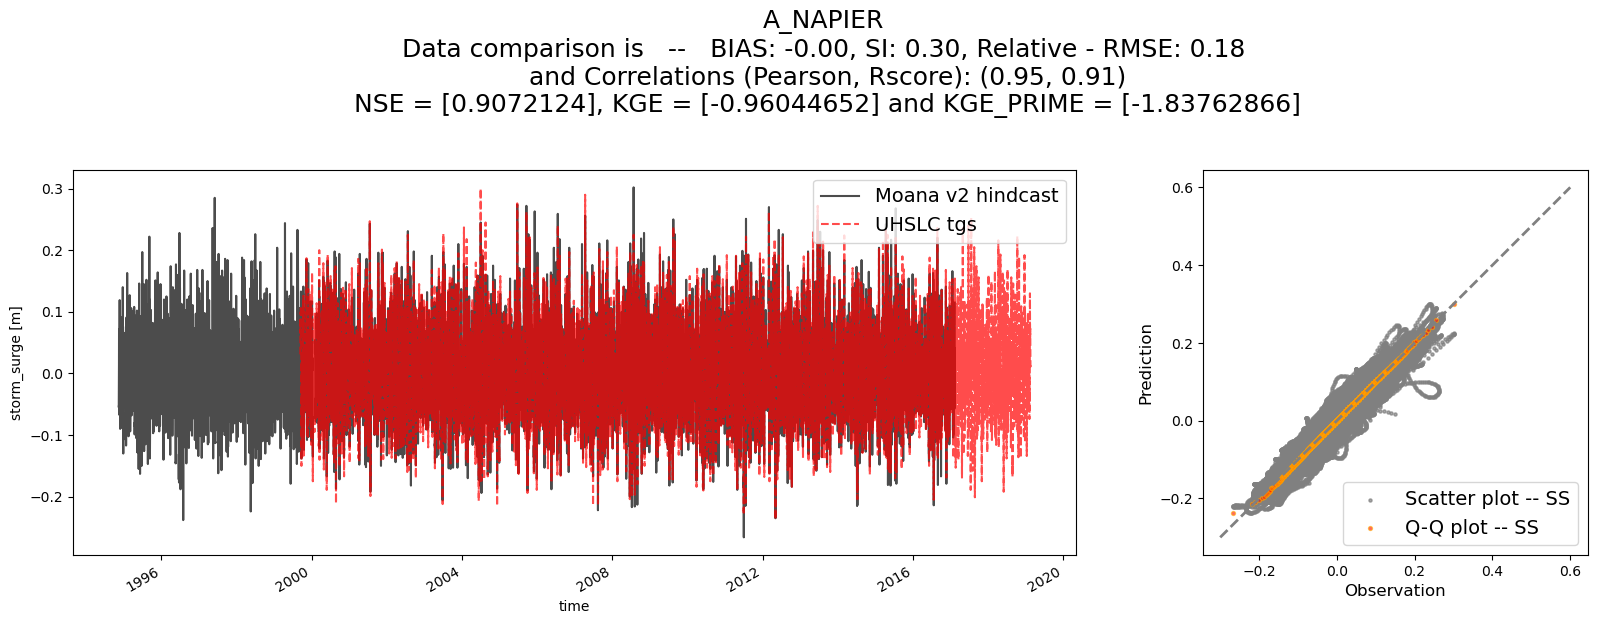

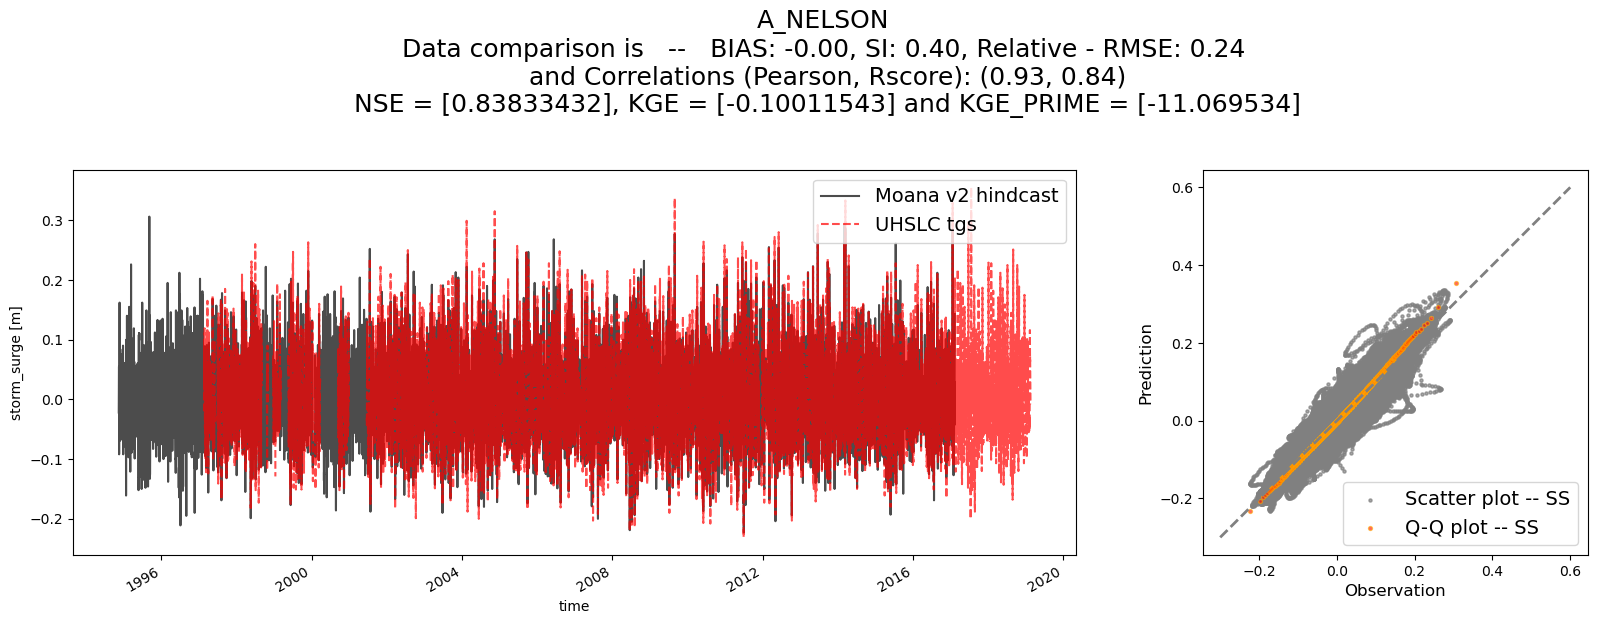

In [2]:
# load the data using the Loader class
load_cfsr_moana_uhslc = Loader(
    data_to_load=('cfsr','moana','uhslc'),
    time_resample='1D', load_winds=(True,None),
    plot=(False,True,True)
)
# validate the data
load_cfsr_moana_uhslc.validate_datasets(
    comparison_variables=[['ss'],['ss']]
)

In [3]:
# class attributes can be inspectioned below
load_cfsr_moana_uhslc

In [4]:
# but predictor files, if saved, can be easily loaded like this
load_cfsr_moana_uhslc = Loader(
    load_predictor_files=(
        True,['../data/cfsr/CFSR_MSLP_daily.nc','../data/cfsr/CFSR_WINDs_daily.nc']
    ), plot=(False,False,False)
)


 loading previously saved atmospheric data from (True, ['../data/cfsr/CFSR_MSLP_daily.nc', '../data/cfsr/CFSR_WINDs_daily.nc']) 


 loading the Moana v2 hindcast data... 


 loading the UHSLC tidal guages... 



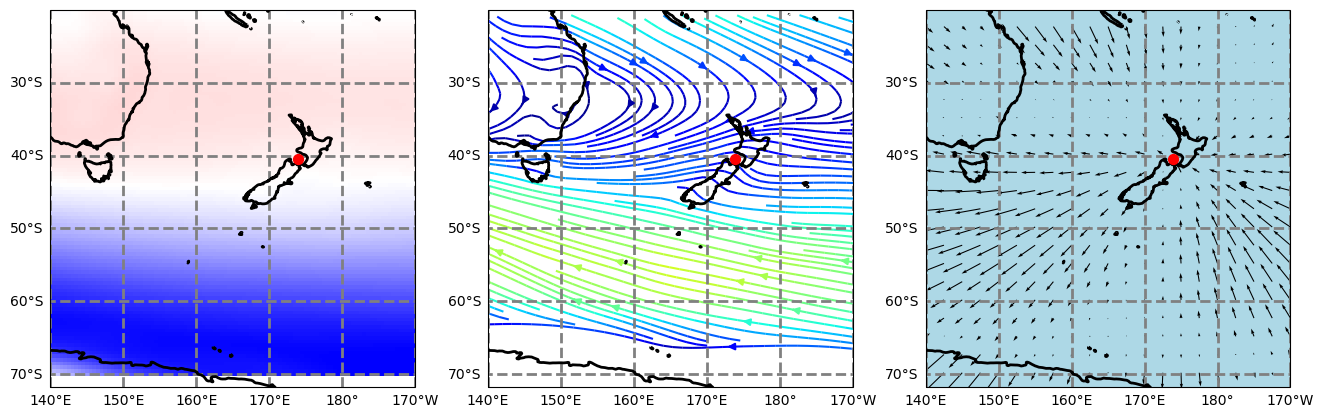

In [5]:
# lets plot the atmospheric data
from sscode.plotting.data import plot_pres_winds
plot_pres_winds(
    [load_cfsr_moana_uhslc.predictor_slp.SLP,
     load_cfsr_moana_uhslc.predictor_wind
    ] # pass list with SLP dataarray and winds dataset
)

## Projected winds + inverse barometer

Finally, we have calculated how the projected winds affect a location in New Zealand, and also the inverse barometer, which is a linear relation between the slp fields and the storm surge. Both results can be seen below:


 plotting the projected winds!! 



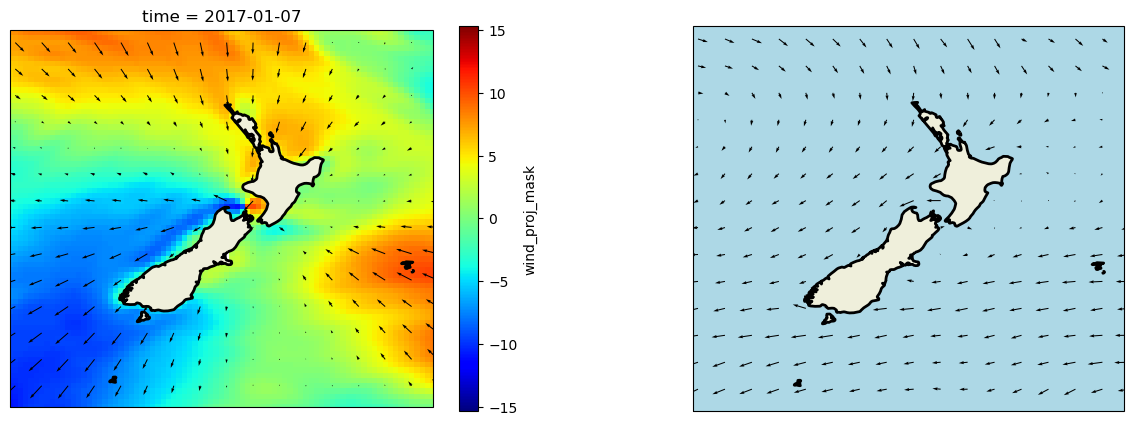

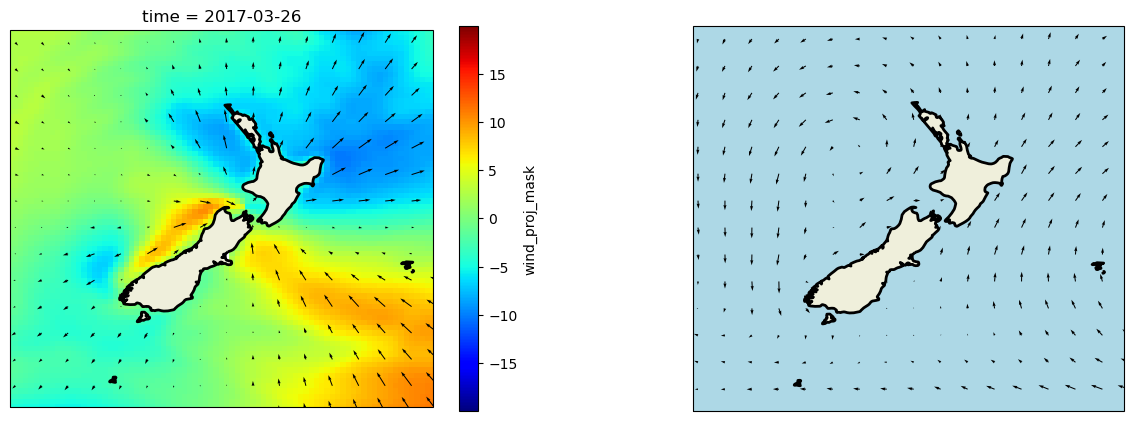


 loading the Moana v2 hindcast data (ss)... 


 plotting the inverse barometer!! 



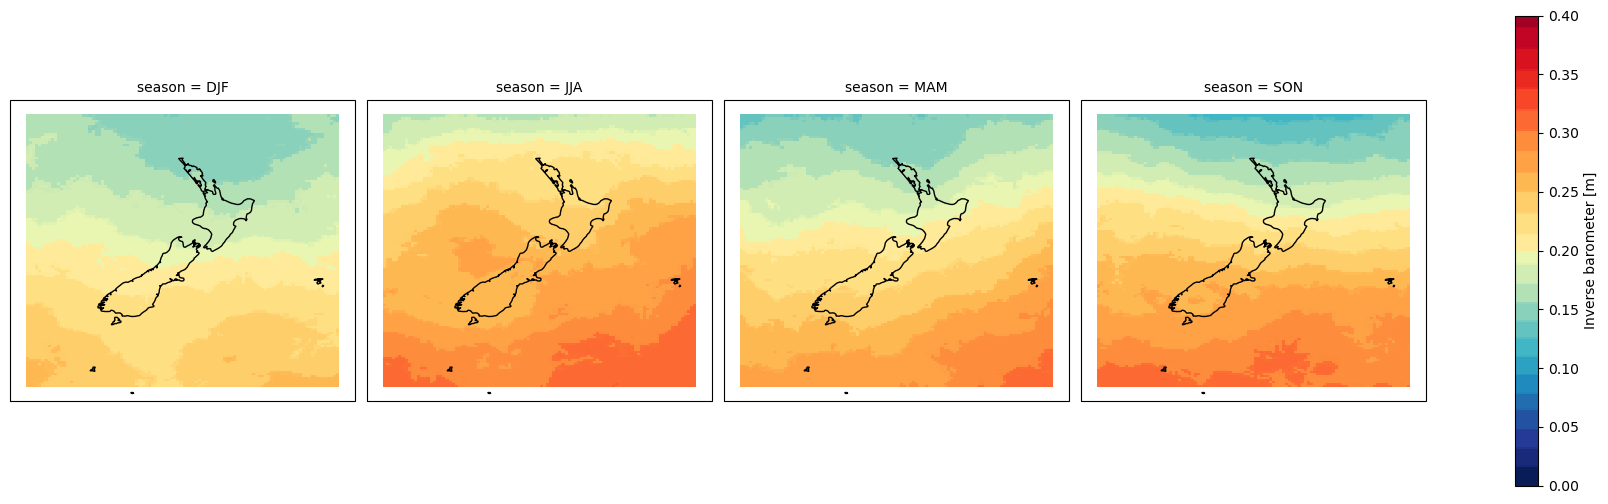

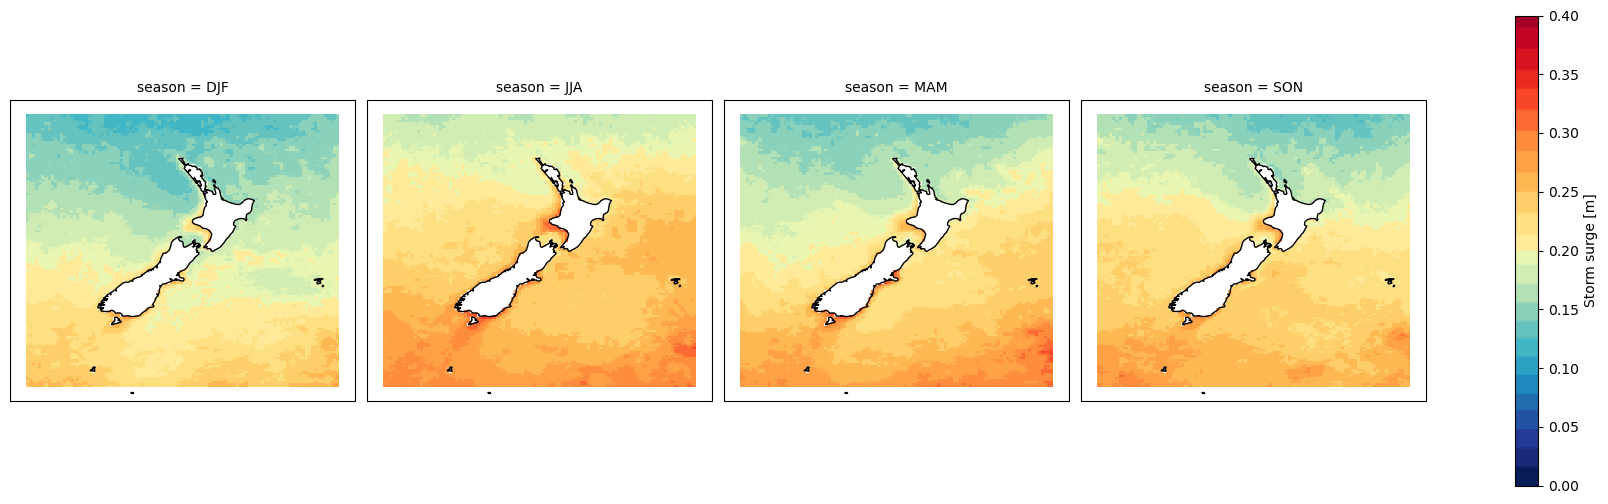

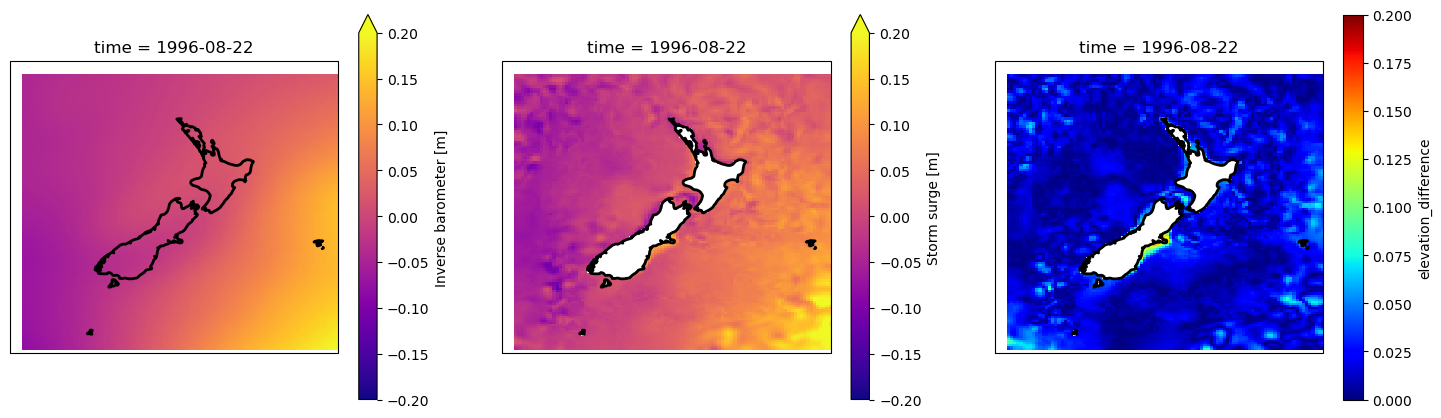

In [6]:
# plot extra data if wanted
plot_extra_data = True
if plot_extra_data:
    from sscode.plotting.data import plot_winds, plot_pres_ibar
    plot_winds(load_cfsr_moana_uhslc.predictor_wind, 
               n_times=2, quiv_step=5) # projected winds
    plot_pres_ibar(load_cfsr_moana_uhslc.predictor_slp.SLP,
                   load_moana_hindcast_ss(daily=True)) # inverse barometer